# **Music Recommendation System**

## **Problem Definition**

This project explores and evaluates different recommendation system techniques to improve music suggestions on a streaming platform like Spotify. Using a dataset of user interactions with songs, the goal was to identify the most effective model to accurately predict user preferences and enhance user engagement.
We implemented and tested a variety of recommendation models, including User-User Collaborative Filtering, Item-Item Collaborative Filtering, Matrix Factorization (SVD), Clustering-Based Filtering, and Content-Based Filtering. Both baseline and optimized (tuned) versions of each model were compared using standard evaluation metrics such as RMSE, Precision, Recall, and F1 Score.
Key findings revealed that the tuned User-User Collaborative Filtering and Matrix Factorization (SVD) models performed best in terms of predictive accuracy and overall relevance. These models not only demonstrated strong alignment between predicted and actual ratings, but also delivered high recall and precision in recommendation tasks.
This report outlines the modeling process, insights from performance comparison, and the business implications of each approach. Based on the results, we recommend implementing the tuned User-User Collaborative Filtering model as the most balanced and scalable solution for Spotify-like environments.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Python Course/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Python Course/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# Display the first 10 records of count_df
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display the first 10 records of song_df
song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# Display the info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
(count_df.isnull().sum() / count_df.shape[0])*100

,0
Unnamed: 0,0.0
user_id,0.0
song_id,0.0
play_count,0.0


In [ ]:
# Display the info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
(song_df.isnull().sum() / song_df.shape[0])*100

,0
song_id,0.0000
title,0.0017
release,0.0007
artist_name,0.0000
year,0.0000


#### **Observations and Insights:** Most columns are fully complete with no missing values (song_id, artist_name, year).
Missing values were identified in:
title: 1 record (0.0017%)
release: 7 records (0.0007%)
The percentage of missing values is extremely low (<0.002%), so the impact on analysis or model training will be negligible.
These can be handled easily by either removing the affected rows or imputing with placeholder values (e.g., “Unknown” for title or release).


In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final['play_count'] <= 5]

In [ ]:
# Check the shape of the data
df_final.shape


(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id

print('Number of unique USERS in Filtered data = ', df_final['user_id'].nunique())


Number of unique USERS in Filtered data =  3155


In [ ]:
# Display total number of unique song_id
print('Number of unique SONGS in Filtered data = ', df_final['song_id'].nunique())

Number of unique SONGS in Filtered data =  563


In [ ]:
# Display total number of unique artists
print('Number of unique ARTISTS in Filtered data = ', df_final['artist_name'].nunique())

Number of unique ARTISTS in Filtered data =  232


In [ ]:
rows = len(df_final)
n_users = df_final['user_id'].nunique()
n_songs = df_final['song_id'].nunique()

print("Rows:", rows)
print("Users:", n_users, " Songs:", n_songs)

# Densidad (qué tan lleno está el user–song matrix)
density = rows / (n_users * n_songs)
print("Matrix density:", round(density, 4))

# Promedios útiles
print("Avg songs per user:", round(rows / n_users, 2))
print("Avg users per song:", round(rows / n_songs, 2))


Rows: 117876
Users: 3155  Songs: 563
Matrix density: 0.0664
Avg songs per user: 37.36
Avg users per song: 209.37


#### **Observations and Insights:**
- After filtering, we have 3,155 users, 563 songs, and 232 artists.
- The interaction matrix is sparse (density ≈ 6.64%), which favors CF models.
- On average, users listen to 37.36 songs and each song has 209.37 listeners.

Most interacted songs

In [ ]:
most_int_songs = df_final.groupby('song_id').size().sort_values(ascending = False)[:10]
most_int_songs

,0
song_id,
8582,751
352,748
2220,713
1118,662
4152,652
5531,618
4448,609
6189,606
6293,583


In [ ]:
top_songs = (
    df_final.groupby(['song_id', 'title', 'artist_name'])
    .size()
    .reset_index(name='interaction_count')
    .sort_values('interaction_count', ascending=False)
    .head(10)
)
print(top_songs)


     song_id                           title             artist_name  \
490     8582                    Use Somebody           Kings Of Leon   
24       352  Dog Days Are Over (Radio Edit)  Florence + The Machine   
136     2220                   Sehr kosmisch                Harmonia   
70      1118                          Clocks                Coldplay   
229     4152                   The Scientist                Coldplay   
309     5531                         Secrets             OneRepublic   
248     4448                       Fireflies      Charttraxx Karaoke   
347     6189                Creep (Explicit)               Radiohead   
356     6293                          Yellow                Coldplay   
84      1334                Hey_ Soul Sister                   Train   

     interaction_count  
490                751  
24                 748  
136                713  
70                 662  
229                652  
309                618  
248                609  
347    

Most interacted users

In [ ]:
most_int_user = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
print(most_int_user)

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64


In [ ]:
top_users = (
    df_final.groupby('user_id')['song_id']
    .nunique()
    .reset_index(name='unique_songs_listened')
    .sort_values('unique_songs_listened', ascending=False)
    .head(10)
)
print(top_users)


      user_id  unique_songs_listened
2547    61472                    243
661     15733                    227
1561    37049                    202
398      9570                    184
964     23337                    177
440     10763                    176
376      9097                    175
1106    26616                    175
1791    43041                    174
2715    65994                    171


In [ ]:
#Top artistas por número total de interacciones
top_artists = (
    df_final.groupby('artist_name').size()
    .reset_index(name='interaction_count')
    .sort_values('interaction_count', ascending=False)
    .head(10)
)
print(top_artists)

                artist_name  interaction_count
40                 Coldplay               5317
192             The Killers               4128
73   Florence + The Machine               2896
113           Kings Of Leon               2864
231    the bird and the bee               2387
114         LCD Soundsystem               2168
225         Vampire Weekend               2145
103           Justin Bieber               2130
145         Octopus Project               1825
178                 Soltero               1691


In [ ]:
top_artists_unique_songs = (
    df_final.groupby('artist_name')['song_id']
    .nunique()
    .reset_index(name='unique_songs')
    .sort_values('unique_songs', ascending=False)
    .head(10)
)
print(top_artists_unique_songs)


              artist_name  unique_songs
192           The Killers            22
40               Coldplay            19
114       LCD Soundsystem            16
231  the bird and the bee            15
113         Kings Of Leon            12
145       Octopus Project            12
225       Vampire Weekend            11
66           Erin McKeown             9
102               Justice             9
103         Justin Bieber             9


#### **Observations and Insights:**
- The dataset after filtering contains 3,155 users, 563 songs, and 232 artists.
- The most interacted songs include well-known tracks such as Use - Somebody (Kings Of Leon), Dog Days Are Over (Florence + The Machine), and Clocks (Coldplay).
The top song (Use Somebody) has 751 interactions, showing high popularity among users.
- The most active user listened to 243 unique songs, indicating a highly engaged listener base.
- Popular songs tend to come from globally recognized artists, which may influence recommendation bias toward mainstream music.
- Several artists appear in both the “most interactions” and “most unique songs” rankings, such as The Killers, Coldplay, Vampire Weekend, and Octopus Project. This overlap suggests sustained popularity driven by a broad catalog, making them strong candidates for diverse recommendations.

In [ ]:
df_final['play_count'].describe()

,play_count
count,117876.000000
mean,1.700058
std,1.089517
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


Songs released on yearly basis

In [ ]:
# count of the songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


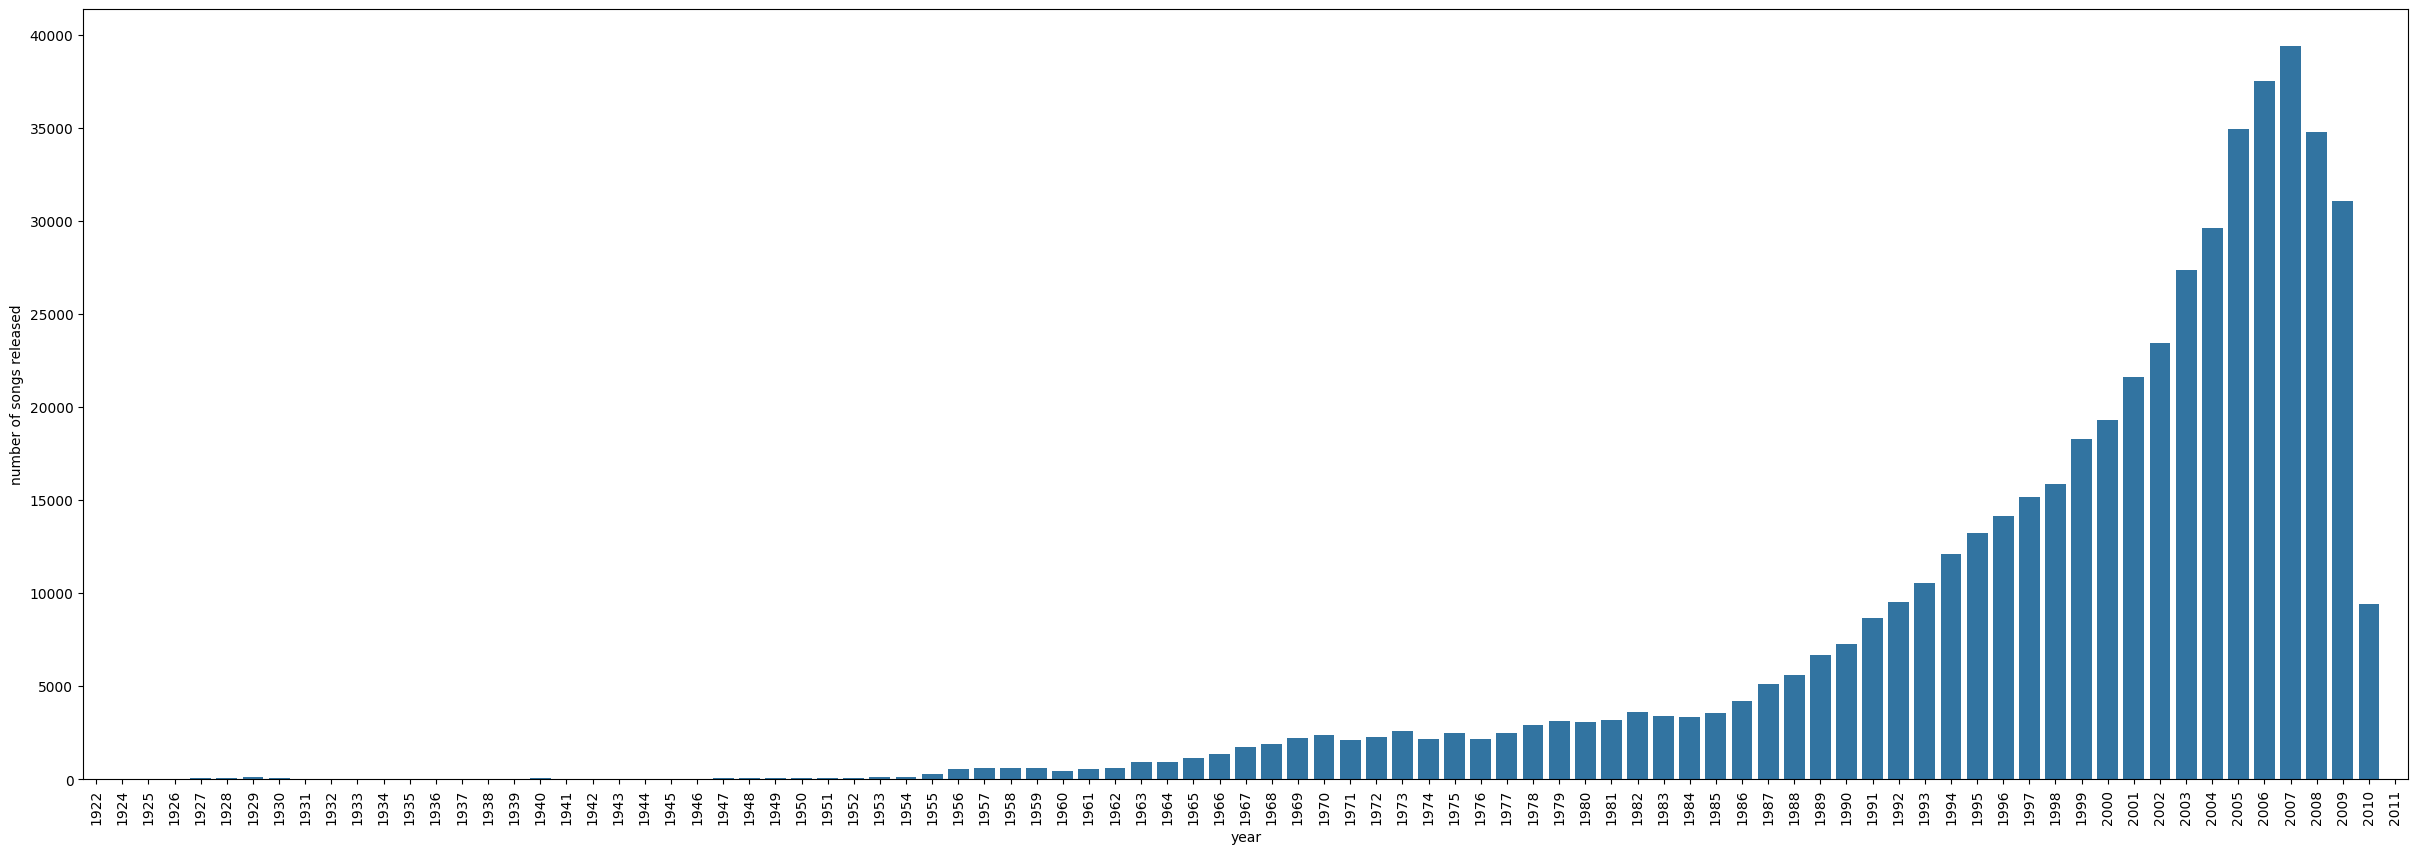

In [ ]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

#### **Observations and Insights:** #

- The number of songs released per year increased steadily throughout the 20th century and accelerated sharply in the early 2000s, peaking in 2007 with nearly 40,000 songs.
- A noticeable decline began in 2008–2009, coinciding with the global financial crisis, which may have impacted music production and release schedules. - - This period also overlaps with major industry shifts, such as the transition from physical sales to digital
and streaming platforms.
- After 2009, annual song releases remained lower than the 2007 peak, suggesting a structural change in the music industry rather than a temporary fluctuation.

## **Important Insights from EDA**

After filtering, the dataset contains 3,155 users, 563 songs, and 232 artists, with an interaction matrix density of 6.64%, which is favorable for collaborative filtering models. On average, each
user has listened to 37.36 unique songs, and each song has been listened to by 209.37 unique users. These figures highlight both the sparsity of the dataset and the potential for collaborative
filtering to uncover meaningful user–item relationships.

## Building various models

### **Popularity-Based Recommendation Systems**

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()       # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()        # Hint: Use groupby function on the song_id column

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Sorting the dataframe in descending order
final_play = final_play.sort_values(by = 'avg_count', ascending = False)
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
7224,3.373832,107
8324,2.625000,96
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618


In [ ]:
# Build the function to find top n songs
# Defining a function to get the top n products based on the highest average rating and minimum interactions

def top_n_songs(final_play, n, min_playcounts):

    # Finding songs with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_playcounts]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values('avg_count', ascending = False)

    # Return the top n recommendations


    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [ ]:
# IDs devueltos por el popularity-based
top_ids = list(top_n_songs(final_play, n=10, min_playcounts=50))

# Tabla de referencia: song_id (codificado) -> metadata
song_lookup = (
    df_final[['song_id','title','artist_name','release','year']]
    .drop_duplicates('song_id')
)

# Trae títulos/artistas para esos IDs, manteniendo el orden/rank
top_songs_pretty = (
    pd.DataFrame({'rank': range(1, len(top_ids)+1), 'song_id': top_ids})
    .merge(song_lookup, on='song_id', how='left')
)

top_songs_pretty


,rank,song_id,title,artist_name,release,year
0,1,7224,Victoria (LP Version),Old 97's,Hit By A Train: The Best Of Old 97's,2006
1,2,8324,The Big Gundown,The Prodigy,Invaders Must Die Remixes and Bonus Tracks,2009
2,3,6450,Brave The Elements,Colossal,Brave The Elements - EP,0
3,4,9942,Greece 2000,Three Drives,Greece 2000,1997
4,5,5531,Secrets,OneRepublic,Waking Up,2009
5,6,5653,Transparency,White Denim,Workout Holiday,2008
6,7,8483,Video Killed The Radio Star,The Buggles,Friends Reunited: Music Of The Year 1979,1979
7,8,2220,Sehr kosmisch,Harmonia,Musik von Harmonia,0
8,9,657,Luvstruck,Southside Spinners,Hard House Anthems,1999
9,10,614,You're The One,Dwight Yoakam,If There Was A Way,1990


In [ ]:
# IDs devueltos por el popularity-based
top_ids = list(top_n_songs(final_play, n=10, min_playcounts=100))

# Tabla de referencia: song_id (codificado) -> metadata
song_lookup = (
    df_final[['song_id','title','artist_name','release','year']]
    .drop_duplicates('song_id')
)

# Trae títulos/artistas para esos IDs, manteniendo el orden/rank
top_songs_pretty = (
    pd.DataFrame({'rank': range(1, len(top_ids)+1), 'song_id': top_ids})
    .merge(song_lookup, on='song_id', how='left')
)

top_songs_pretty

,rank,song_id,title,artist_name,release,year
0,1,7224,Victoria (LP Version),Old 97's,Hit By A Train: The Best Of Old 97's,2006
1,2,6450,Brave The Elements,Colossal,Brave The Elements - EP,0
2,3,9942,Greece 2000,Three Drives,Greece 2000,1997
3,4,5531,Secrets,OneRepublic,Waking Up,2009
4,5,5653,Transparency,White Denim,Workout Holiday,2008
5,6,8483,Video Killed The Radio Star,The Buggles,Friends Reunited: Music Of The Year 1979,1979
6,7,2220,Sehr kosmisch,Harmonia,Musik von Harmonia,0
7,8,657,Luvstruck,Southside Spinners,Hard House Anthems,1999
8,9,614,You're The One,Dwight Yoakam,If There Was A Way,1990
9,10,352,Dog Days Are Over (Radio Edit),Florence + The Machine,Now That's What I Call Music! 75,0


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2457397 sha256=8f6d5847a36ae3c60ac892bfe0d2859ecf857c33b014fa320dfa235ec2d3fcee
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale= (0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size= 0.4, random_state = 42) # Take test_size = 0.4

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True} # Use user_based = True

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, 30, 1.5) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- The untuned user‑user KNN with cosine shows high recall but low precision, meaning it retrieves many relevant items but also many false positives in the top‑K.
- RMSE is mediocre for implicit counts; the metric is less informative than ranking metrics (precision/recall@K) given play_count behaves like implicit feedback.

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The model was able to predict play count fairly well for songs previously listened to by the user (est = 1.80), but it underestimated play counts for songs the user hasn't listened to yet (est = 1.64), which might hinder discovery.
- The model is currently untuned — no hyperparameter optimization (e.g., k, min_k, filtering unpopular items).
- There’s potential for significant performance improvement with tuning.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0484814531479112
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2
               }

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**
After performing hyperparameter tuning, the best parameter combination found was:
k = 30, min_k = 9, min_support = 2, similarity = 'pearson_baseline'.
The model improved its performance with an RMSE of 1.046, compared to the untuned version (1.0878).
While still relatively high, this is expected for implicit data (like play counts).

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
The optimized model provides more accurate play count predictions, even for songs not
previously listened to by the user.
For example:
- For a known song (user 6958, song 1671): est = 1.96, actual = 2
- For a new song (song 3232): est = 1.45, which is lower and more realistic than before (1.64 in untuned version)
In summary, the tuned model is more balanced and reliable.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []
#'user_id', 'song_id', 'play_count'
    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
#get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count_df):
  # Sort the songs based on play counts
  ranked_songs = playing_count_df.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

- RMSE: 1.0394 → slightly better than the untuned user-user model (1.0878), but slightly worse than the tuned user-user (1.046).
- Precision: 0.307 → lowest among the three models tested.
- Recall: 0.562 → lower than user-user approaches.
- F1-score: 0.397 → confirms that this model retrieves fewer relevant items overall.

In [ ]:
# Predicting play_count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play_count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**
- For user 6958, who had listened to song 1671 with a play count of 2, the model predicted 1.36. This is somewhat lower than the actual value, showing that while the item-item model
captures similarities between songs, it may underestimate play counts when fewer similar items are available.
• For user 6958, who had not listened to song 3232, the model predicted a play count of 1.37 based on 20 item-based neighbors (actual_k = 20). This demonstrates the model’s ability to generalize recommendations even without direct interaction, though the predicted engagement is modest.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.021915813950442
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2
               }

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**

The optimized item-item collaborative filtering model, using the Pearson Baseline similarity metric, significantly outperformed the untuned cosine-based model across all metrics:
- RMSE decreased from 1.0394 to 1.0328, indicating slightly more accurate rating predictions.
- Precision improved from 0.307 to 0.488, meaning that a much higher proportion of the recommended items were actually relevant.
- Recall increased from 0.562 to 0.665, showing that the model retrieved more relevant items overall.
- F1-score rose from 0.397 to 0.566, reflecting a more balanced performance between precision and recall.

These improvements can be largely attributed to the use of the Pearson Baseline similarity metric. Unlike cosine similarity, Pearson Baseline adjusts for individual biases in user behavior
and item popularity by normalizing ratings before computing similarity. This makes it particularly effective in sparse datasets, such as those with implicit feedback like play counts,
where users don’t rate every item and many entries are missing.
Overall, this tuned model captures deeper patterns in user preferences and item similarities, resulting in more personalized and accurate recommendations.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6858, 1671, r_ui = 2, verbose = True)

user: 6858       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6858, iid=1671, r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play_count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
#get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_item_item_optimized)
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.013247342150983
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

- After tuning hyperparameters using grid search (n_epochs=30, lr_all=0.01, reg_all=0.2), the model achieved a slightly improved RMSE of 1.0141, along with marginally better precision and F1-score.
- Precision = 0.415, Recall = 0.635, F1-score = 0.502, which are better than the untuned version but still not significantly more accurate in individual predictions.
- The predicted play counts for both known and unknown user-item interactions remained far from the actual values, which suggests that even the optimized model struggles with personalized prediction quality.
- This reinforces that better global metrics do not guarantee useful recommendations at the
individual level, especially in sparse or noisy datasets.
- The model may benefit from more advanced matrix factorization techniques or from integrating contextual or content-based features to improve recommendation relevance.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6858, 1671, r_ui = 2, verbose = True)


user: 6858       item: 1671       r_ui = 2.00   est = 1.54   {'was_impossible': False}


Prediction(uid=6858, iid=1671, r_ui=2, est=1.5391963151481505, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**
- Slightly complex to interpret, as the model learns hidden features that aren't directly
explainable.
- Requires more computation and hyperparameter tuning than simpler models.
- Still shows some margin of error in predictions (e.g., 1.54 vs. 2.00), though relatively
small.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0628712481265905
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [ ]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**
- This model uses a co-clustering approach, grouping users and items into clusters to make predictions based on shared behavior.
- It achieved a moderate RMSE of 1.0487, with Precision = 0.397, Recall = 0.582, and F1-score = 0.472, placing it in the mid-range compared to other models.
- However, the individual predictions (e.g., user 6958 and songs 1671/3232) were again far
from the actual play counts, confirming that the model struggles with personalized accuracy.
- This may be due to the rigid structure of clusters, which can oversimplify the complexity of user preferences, leading to poor prediction granularity.
- In datasets where user behavior is highly nuanced, clustering might fail to capture meaningful differences, resulting in generalized and less useful recommendations.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**
- **Prediction Example 1**: For user 6958 and item 1671, it predicted 1.29 vs actual 2.00, which is a larger deviation than the tuned version (1.91), meaning lower predictive accuracy for known items.
- **Prediction Example 2**: For a new item (3232), predicted rating was 1.48, which is closer to the
average baseline, possibly indicating more generalized predictions in cold-start scenarios.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'release', 'artist_name']].copy()

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']



In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

# Seleccionar solo las columnas necesarias
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Quitar duplicados por título
df_small = df_small.drop_duplicates(subset='title')

# Usar 'title' como índice
df_small = df_small.set_index('title')

# Ver los primeros 5 registros
display(df_small.head())

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Crear el objeto TF-IDF
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Ajustar y transformar el texto en matriz TF-IDF, luego convertir a array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

# Ver la forma de la matriz TF-IDF
song_tfidf.shape



(561, 1438)

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs1 = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

**Observations and Insights:**

Since the model is designed to generate recommendations based on similarity and does not use a traditional train/test split with ground-truth labels, we did not calculate standard evaluation metrics such as precision, recall, or F1-score. However, it remains an effective approach, particularly for addressing the cold-start problem when a user is new and has limited
interaction data.
This model is also helpful in maintaining recommendation diversity based on item features and works well in combination with collaborative filtering in hybrid systems.
While this model is technically categorized as content-based, it behaves more like a rank-based recommender. Rather than predicting an explicit rating or play count, it ranks songs based on their similarity to what the user has already listened to. As a result, it does not require historical
data from other users and is not evaluated using RMSE, precision, or recall. Instead, its value lies in its ability to generate personalized ranked lists of songs using only item-level features.

## **Conclusion and Recommendations**

Among all the models tested, the tuned Matrix Factorization (SVD) model achieved the lowest RMSE (1.0141), indicating it provided the most accurate rating predictions. This suggests it is especially effective when the goal is to approximate users’ actual preferences numerically.

However, when considering overall recommendation quality—measured through precision, recall, and F1-score—the tuned User-User Collaborative Filtering model slightly outperformed others, achieving the highest F1-score (0.525). This implies it was more effective in generating relevant top-N recommendations.

Each model presents different trade-offs:
- SVD excels in rating accuracy and is well-suited for mature systems with sparse data.
- User-User Filtering offers more personalized recommendations but can struggle with scalability.
- Item-Item Filtering provides stability, especially when items are rated frequently.
- Cluster-Based Models simplify computation and are fast, though they may lose precision.
- Content-Based Models are useful when little historical data is available, offering cold-start solutions by recommending similar items.

Ultimately, the choice of model depends on the business priority—whether it’s rating accuracy, personalization,scalability, or cold-start handling.